In [198]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from joblib import dump , load

In [199]:
os.chdir("D:\\OneDrive\\Documents\\Internship -temp\\Task 3\\Task 3_ Credit card Prediction\\")
data_train = pd.read_csv("train_data.csv")
data_test = pd.read_csv("test_data.csv")

Exploratory Data Analysis

In [200]:
data_train.isna().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [201]:
data_train.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [202]:
data_train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


Feature Engineering

In [203]:
data_train = data_train.drop("Job title", axis = 1)

In [204]:
num_feat = ["Children count", "Income", "Age", "Employment length", "Family member count", "Account age"]
cat_feat = [feat for feat in data_train.columns if feat not in num_feat and feat != "ID"]

In [205]:
data_train["Age"] = -data_train["Age"] / 365.25
data_train["Employment length"] = -data_train["Employment length"] / 365.25
data_train["Account age"] = -data_train["Account age"]
data_train = data_train.drop("ID",axis=1)
data_train.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,44.547570,8.517454,1,0,0,0,2.0,17.0,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,27.734428,4.520192,1,0,0,0,2.0,1.0,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,35.101985,15.488022,1,0,0,0,4.0,38.0,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,57.300479,5.601643,1,0,0,1,1.0,11.0,0
4,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,44.372348,1.409993,1,0,1,0,1.0,41.0,0


In [206]:
data_train.describe().drop(cat_feat, axis=1, errors="ignore")

,Children count,Income,Age,Employment length,Family member count,Account age
count,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.000000,29165.000000
mean,0.430790,1.868904e+05,43.749425,-162.238908,2.197531,26.137734
std,0.741882,1.014096e+05,11.507180,376.881269,0.912189,16.486702
min,0.000000,2.700000e+04,21.095140,-999.980835,1.000000,-0.000000
25%,0.000000,1.215000e+05,34.154689,1.127995,2.000000,12.000000
50%,0.000000,1.575000e+05,42.614648,4.262834,2.000000,24.000000
75%,1.000000,2.250000e+05,53.234771,8.632444,3.000000,39.000000
max,19.000000,1.575000e+06,68.862423,43.019849,20.000000,60.000000


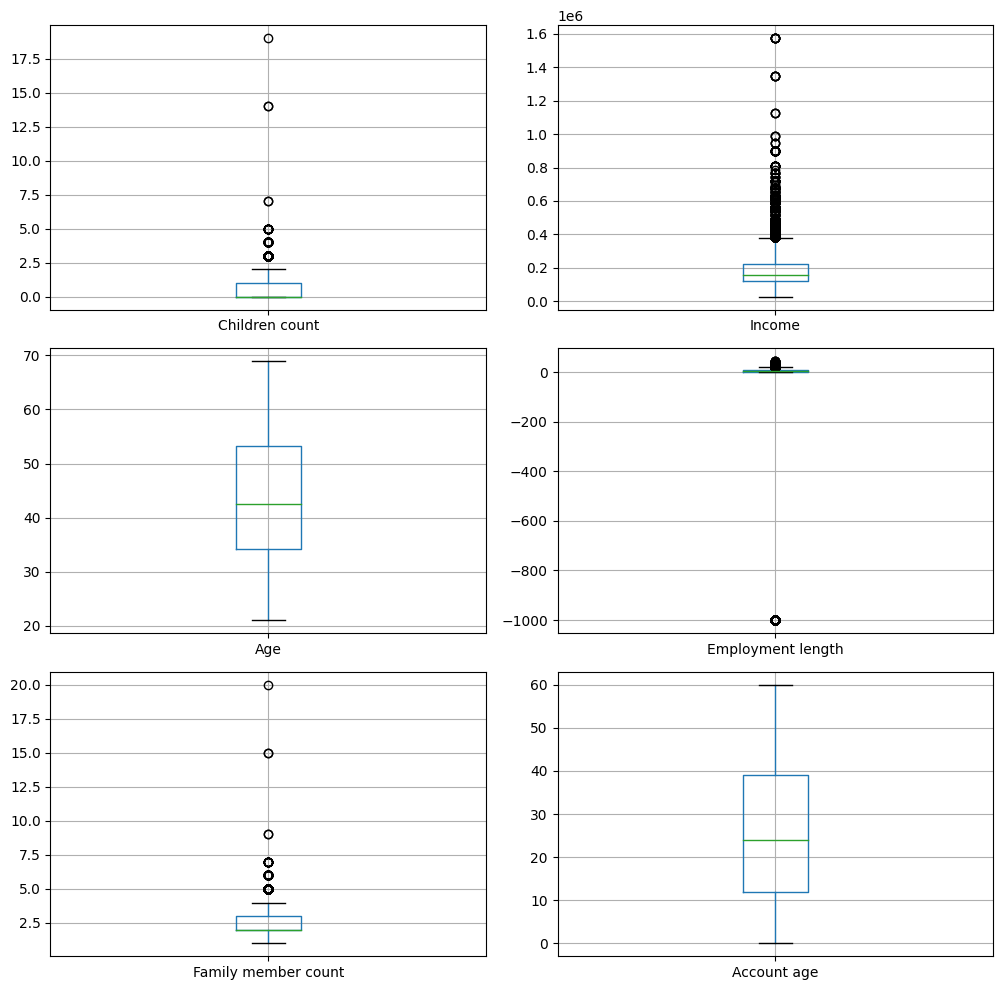

In [207]:
rows = int(len(num_feat) / 2)
figure, axes = plt.subplots(nrows = rows, ncols = 2, figsize = (10,10))
axes = axes.flatten()

for i,feat in enumerate(num_feat):
    data_train.boxplot(feat,ax=axes[i])


plt.tight_layout()
plt.show()

In [208]:
label = LabelEncoder()
data_train["Education level"] = label.fit_transform(data_train["Education level"])
data_train["Marital status"] = label.fit_transform(data_train["Marital status"])
data_train["Dwelling"] = label.fit_transform(data_train["Dwelling"])
data_train["Gender"] = label.fit_transform(data_train["Gender"])
data_train["Has a car"] = label.fit_transform(data_train["Has a car"])
data_train["Has a property"] = label.fit_transform(data_train["Has a property"])
data_train["Employment status"] = label.fit_transform(data_train["Employment status"])
data_train.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,44.547570,8.517454,1,0,0,0,2.0,17.0,0
1,0,1,0,1,135000.0,0,1,3,1,27.734428,4.520192,1,0,0,0,2.0,1.0,0
2,0,0,1,2,180000.0,0,4,1,1,35.101985,15.488022,1,0,0,0,4.0,38.0,0
3,0,1,1,0,360000.0,0,1,3,1,57.300479,5.601643,1,0,0,1,1.0,11.0,0
4,0,0,0,0,270000.0,4,4,2,1,44.372348,1.409993,1,0,1,0,1.0,41.0,0


In [209]:
data_train[data_train["Employment length"] == min(data_train["Employment length"])]

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
8,0,0,0,0,90000.0,1,4,3,2,64.279261,-999.980835,1,0,0,0,1.0,50.0,0
10,0,0,1,0,202500.0,1,4,1,1,58.765229,-999.980835,1,0,0,0,2.0,15.0,0
25,0,0,1,0,270000.0,1,4,1,1,58.893908,-999.980835,1,0,1,0,2.0,45.0,0
34,0,0,1,0,99000.0,1,4,3,1,62.502396,-999.980835,1,0,0,0,1.0,22.0,0
37,0,0,1,0,292500.0,1,4,0,1,59.088296,-999.980835,1,0,0,0,2.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29139,0,0,1,0,135000.0,1,4,1,1,63.931554,-999.980835,1,0,0,0,2.0,6.0,0
29151,1,0,1,0,180000.0,1,4,1,1,53.563313,-999.980835,1,0,1,0,2.0,42.0,0
29157,0,1,1,0,81000.0,1,1,1,1,55.849418,-999.980835,1,0,0,0,2.0,43.0,0
29160,0,0,1,0,112500.0,1,4,3,1,64.065708,-999.980835,1,0,1,1,1.0,5.0,0


In [210]:
cutOff_chil = np.quantile(data_train["Children count"],0.99)
cutOff_inc = np.quantile(data_train["Income"], 0.95)
cutOff_emp_min = 0
cutOff_emp_max = np.quantile(data_train["Employment length"],0.95)
data_train = data_train[data_train["Children count"] < cutOff_chil]
data_train = data_train[data_train["Employment length"] > cutOff_emp_min]
data_train = data_train[data_train["Employment length"] < cutOff_emp_max]
data_train = data_train[data_train["Income"] < cutOff_inc]

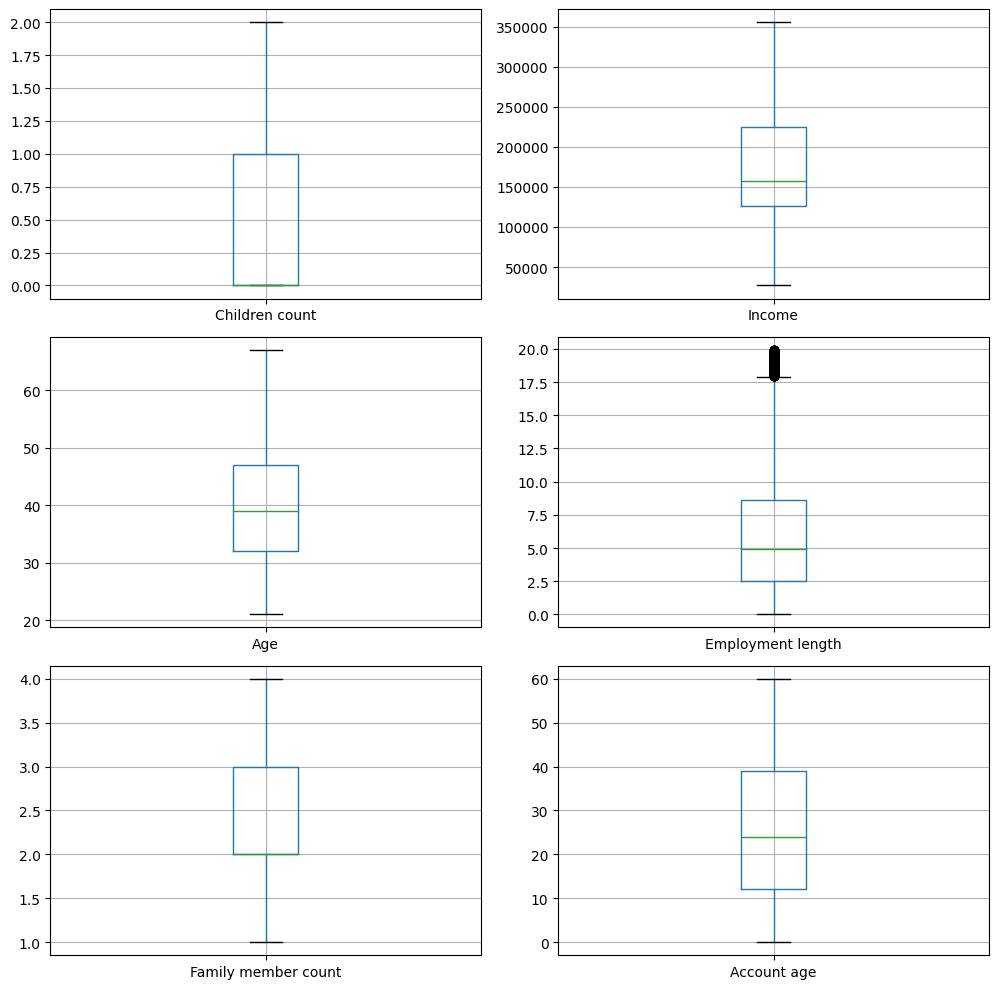

In [211]:
rows = int(len(num_feat) / 2)
figure, axes = plt.subplots(nrows = rows, ncols = 2, figsize = (10,10))

axes = axes.flatten()

for i,feat in enumerate(num_feat):
    data_train.boxplot(feat,ax=axes[i])

plt.tight_layout()
plt.show()

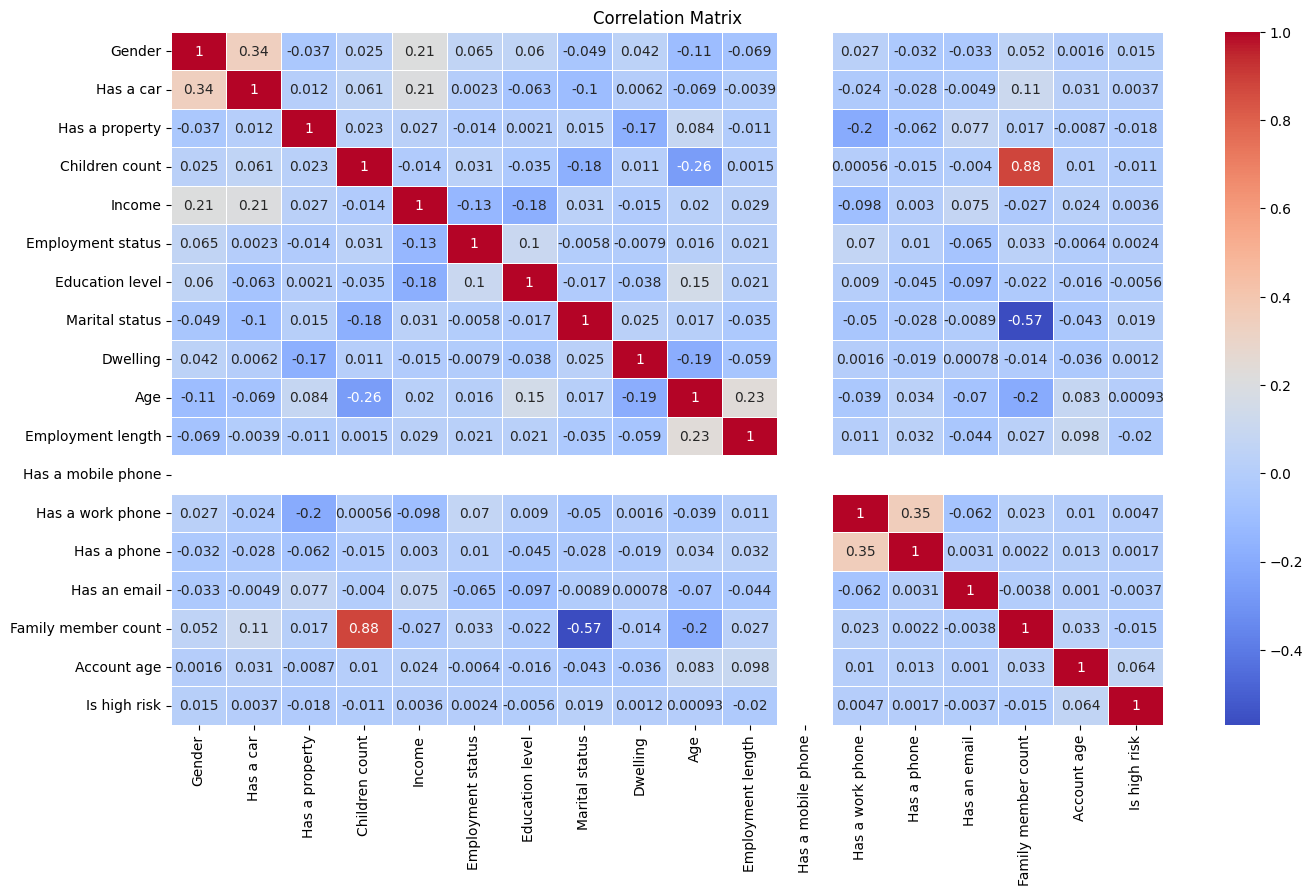

In [212]:
plt.figure(figsize=[16,9])
sns.heatmap(data_train.corr(), annot=True,cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [213]:
corr = data_train.corr()
corr["Is high risk"].abs().sort_values(ascending=False)

Is high risk           1.000000
Account age            0.063698
Employment length      0.019915
Marital status         0.019202
Has a property         0.017929
Gender                 0.014916
Family member count    0.014622
Children count         0.011419
Education level        0.005584
Has a work phone       0.004738
Has a car              0.003681
Has an email           0.003663
Income                 0.003584
Employment status      0.002390
Has a phone            0.001713
Dwelling               0.001208
Age                    0.000931
Has a mobile phone          NaN
Name: Is high risk, dtype: float64

In [214]:
data_train = data_train.drop("Has a car", axis=1)
data_train = data_train.drop("Has an email", axis=1)
data_train = data_train.drop("Income", axis=1)
data_train = data_train.drop("Employment status", axis=1)
data_train = data_train.drop("Has a phone", axis=1)
data_train = data_train.drop("Dwelling", axis=1)
data_train = data_train.drop("Age", axis=1)
data_train = data_train.drop("Has a mobile phone", axis=1)

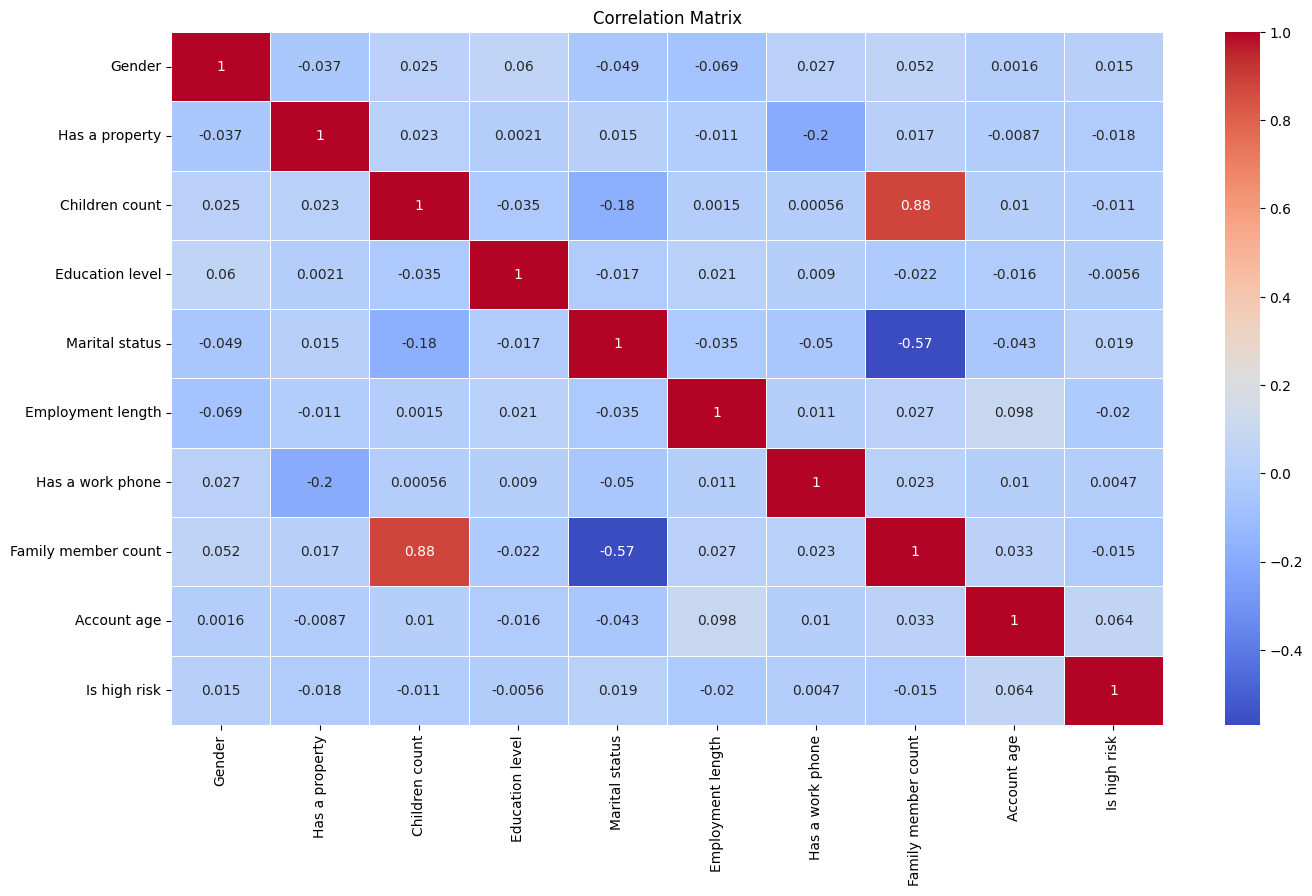

In [215]:
plt.figure(figsize=[16,9])
sns.heatmap(data_train.corr(), annot=True,cmap = "coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Transforming data_test

In [216]:
data_test.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [217]:
data_test["Education level"] = label.fit_transform(data_test["Education level"])
data_test["Marital status"] = label.fit_transform(data_test["Marital status"])
data_test["Dwelling"] = label.fit_transform(data_test["Dwelling"])
data_test["Gender"] = label.fit_transform(data_test["Gender"])
data_test["Has a car"] = label.fit_transform(data_test["Has a car"])
data_test["Has a property"] = label.fit_transform(data_test["Has a property"])
data_test["Employment status"] = label.fit_transform(data_test["Employment status"])
data_test.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,0,0,1,0,202500.0,2,4,2,1,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,1,1,0,0,675000.0,0,1,1,1,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,0,0,0,0,234000.0,2,1,0,1,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,0,1,1,0,445500.0,0,1,1,1,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,0,1,0,0,225000.0,4,4,1,2,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [218]:
data_test = data_test.drop("Has a car", axis=1)
data_test = data_test.drop("Has an email", axis=1)
data_test = data_test.drop("Income", axis=1)
data_test = data_test.drop("Employment status", axis=1)
data_test = data_test.drop("Has a phone", axis=1)
data_test = data_test.drop("Dwelling", axis=1)
data_test = data_test.drop("Age", axis=1)
data_test = data_test.drop("Has a mobile phone", axis=1)
data_test.head()

,ID,Gender,Has a property,Children count,Education level,Marital status,Employment length,Has a work phone,Job title,Family member count,Account age,Is high risk
0,5091261,0,1,0,4,2,-1692,0,Medicine staff,1.0,-6.0,0
1,5096963,1,0,0,1,1,-948,0,Managers,2.0,-16.0,0
2,5087880,0,0,0,1,0,-5215,0,Core staff,2.0,-52.0,0
3,5021949,0,1,0,1,1,-456,0,Managers,2.0,-54.0,0
4,5105705,0,0,0,4,1,-667,0,Laborers,2.0,-48.0,0


In [219]:
data_test["Employment length"] = -data_test["Employment length"] / 365.25
data_test["Account age"] = -data_test["Account age"]
data_test = data_test.drop(["ID","Job title"],axis=1)
data_test.head()

,Gender,Has a property,Children count,Education level,Marital status,Employment length,Has a work phone,Family member count,Account age,Is high risk
0,0,1,0,4,2,4.632444,0,1.0,6.0,0
1,1,0,0,1,1,2.595483,0,2.0,16.0,0
2,0,0,0,1,0,14.277892,0,2.0,52.0,0
3,0,1,0,1,1,1.248460,0,2.0,54.0,0
4,0,0,0,4,1,1.826146,0,2.0,48.0,0


In [220]:
data_train.head()

,Gender,Has a property,Children count,Education level,Marital status,Employment length,Has a work phone,Family member count,Account age,Is high risk
0,1,1,0,4,1,8.517454,0,2.0,17.0,0
1,0,0,1,1,3,4.520192,0,2.0,1.0,0
2,0,1,2,4,1,15.488022,0,4.0,38.0,0
4,0,0,0,4,2,1.409993,0,1.0,41.0,0
5,0,1,0,4,1,10.510609,1,2.0,1.0,0


In [221]:
x_train = data_train.drop("Is high risk", axis=1)
y_train = data_train["Is high risk"]
x_test = data_test.drop("Is high risk", axis=1)
y_test = data_test["Is high risk"]
print(x_train.shape,x_test.shape)

(20815, 9) (7292, 9)


Model Deployment

In [222]:
LR = LogisticRegression(random_state=1106)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5970 1205]
 [  95   22]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7175
           1       0.02      0.19      0.03       117

    accuracy                           0.82      7292
   macro avg       0.50      0.51      0.47      7292
weighted avg       0.97      0.82      0.89      7292



C:\Users\ishaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
DT = DecisionTreeClassifier(random_state=1106)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6978  197]
 [ 100   17]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7175
           1       0.08      0.15      0.10       117

    accuracy                           0.96      7292
   macro avg       0.53      0.56      0.54      7292
weighted avg       0.97      0.96      0.97      7292



In [224]:
RF = RandomForestClassifier(random_state=1106)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7150   25]
 [ 110    7]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.22      0.06      0.09       117

    accuracy                           0.98      7292
   macro avg       0.60      0.53      0.54      7292
weighted avg       0.97      0.98      0.98      7292



In [225]:
GB = GradientBoostingClassifier(random_state=1106)
GB.fit(x_train, y_train)
y_pred = GB.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7162   13]
 [ 114    3]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.19      0.03      0.05       117

    accuracy                           0.98      7292
   macro avg       0.59      0.51      0.52      7292
weighted avg       0.97      0.98      0.98      7292



In [226]:
dump(RF, "Dragon.joblib")

['Dragon.joblib']